# 1. Pustaka Program Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading Dataset

In [4]:
df = pd.read_csv('../data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


Menampilkan informasi dengan detail df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


# 3. Data Preprocessing

cek missing value

In [ ]:
df.isnull().sum()

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64

cek dan hapus data duplikat

In [7]:
# cek duplicate
df.duplicated()

# Menghapus data duplikat
df = df.drop_duplicates()

# cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

Mengubah Nama Kolom (Rename Columns)

In [27]:
df = df.rename(columns={
    'Jenis Kelamin' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting' : 'stunting',
    'Wasting' : 'wasting',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  int8   
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  int8   
 5   wasting        92692 non-null  int8   
dtypes: float64(2), int64(1), int8(3)
memory usage: 3.1 MB


# 4. Data Understanding

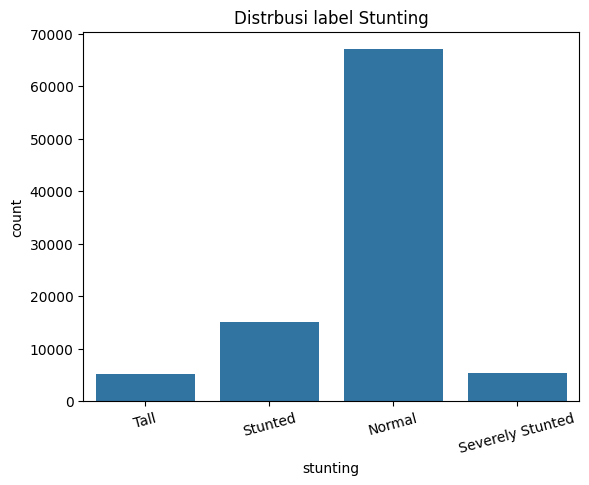

In [11]:
plt.Figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distrbusi label Stunting')
plt.xticks(rotation=15)
plt.show()

# 5. Encoding Data Kategorial (Mapping Label ke kode numerik)

In [15]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] = stunting_cat.cat.codes

# fitur kategorial lain 
for col in['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()


,jenis_kelamin,umur_bulan,Tinggi Badan (cm),Berat Badan (kg),stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


# 6. Analisis Korelasi Antar Fitur

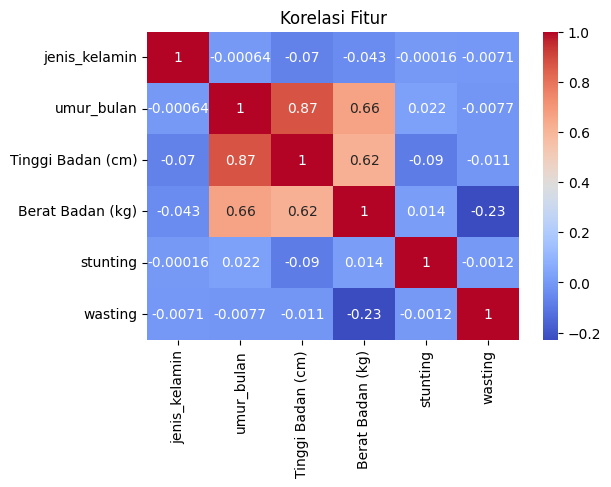

In [16]:
# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur")
plt.show()

# 7. Splitting Data

In [34]:
# memilih fitur dan target 
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
x = df[feature_cols]
y = df['stunting']

# membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(len(X_train), len(X_test))

74153 18539


# 8. Pembuatan Model Decision Tree

In [42]:
# Membangun Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4, 
    random_state=42,
)
# melatih model
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 9. Evaluasi Model Decision Tree

In [44]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes))


Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]


ValueError: Number of classes, 4, does not match size of target_names, 2. Try specifying the labels parameter

# 10. Visualisasi Hasil Model Decision Tree

Kelas unik di data: [0 1 2 3]


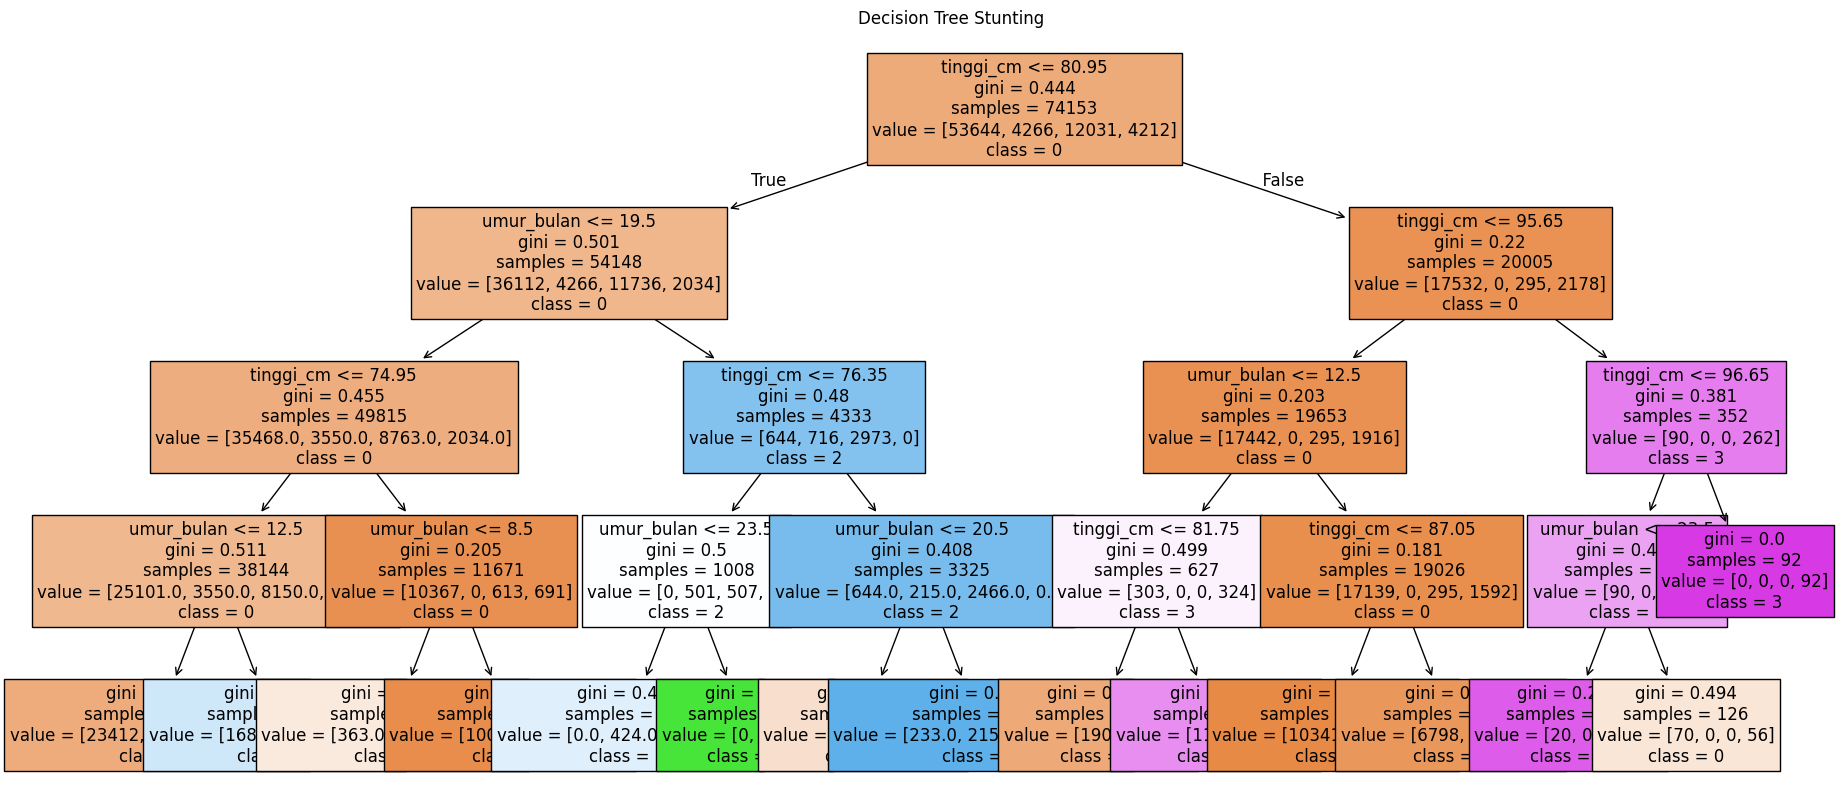

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pastikan jumlah kelas sesuai
print("Kelas unik di data:", dt.classes_)

# Visualisasi pohon keputusan
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=[str(cls) for cls in dt.classes_],
    filled=True,
    fontsize=12
)
plt.title("Decision Tree Stunting")
plt.show()


# 11. Feature Importance

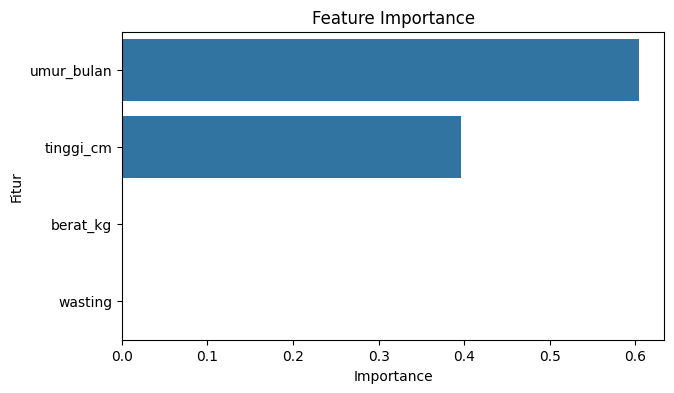

In [47]:
# fitur yang penting 
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

# 12. Hyperparameter Tuning

In [54]:
scores = {}
for d in range(2, nine :=9):
    m = DecisionTreeClassifier(max_depth=d)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Accuracy:", round(scores[best_d]*100, 2), "%")

Best max_depth: 8 | Accuracy: 84.22 %
